### 7th Mini Project
- Name: Youssef Ayman Mohamed 
- RegNum: 211000348

# Import necessary libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern, hog
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

# Own library that contains all the functions used in this project
from utils import *

# Read Datasets

In [3]:
# Define the paths to the datasets
dtd_path = './dtd'
corel_path = './corel'

# Load images from both datasets
dtd_images = load_images_from_folder(dtd_path)
corel_images = load_images_from_folder(corel_path)

# Display the number of images loaded
print(f'Loaded {len(dtd_images)} images from DTD dataset')
print(f'Loaded {len(corel_images)} images from Corel dataset')


# function to print the directory structure of the dataset
def print_directory_structure(images):
    for i, image in enumerate(images):
        print(f'{i+1}. Image shape: {image.shape}')
        

# Print the directory structure of the DTD dataset
print('DTD dataset directory structure:')
print_directory_structure(dtd_images)

# Print the directory structure of the Corel dataset
print('Corel dataset directory structure:')
print_directory_structure(corel_images)




Loaded 5640 images from DTD dataset
Loaded 1000 images from Corel dataset
DTD dataset directory structure:
1. Image shape: (224, 224, 3)
2. Image shape: (224, 224, 3)
3. Image shape: (224, 224, 3)
4. Image shape: (224, 224, 3)
5. Image shape: (224, 224, 3)
6. Image shape: (224, 224, 3)
7. Image shape: (224, 224, 3)
8. Image shape: (224, 224, 3)
9. Image shape: (224, 224, 3)
10. Image shape: (224, 224, 3)
11. Image shape: (224, 224, 3)
12. Image shape: (224, 224, 3)
13. Image shape: (224, 224, 3)
14. Image shape: (224, 224, 3)
15. Image shape: (224, 224, 3)
16. Image shape: (224, 224, 3)
17. Image shape: (224, 224, 3)
18. Image shape: (224, 224, 3)
19. Image shape: (224, 224, 3)
20. Image shape: (224, 224, 3)
21. Image shape: (224, 224, 3)
22. Image shape: (224, 224, 3)
23. Image shape: (224, 224, 3)
24. Image shape: (224, 224, 3)
25. Image shape: (224, 224, 3)
26. Image shape: (224, 224, 3)
27. Image shape: (224, 224, 3)
28. Image shape: (224, 224, 3)
29. Image shape: (224, 224, 3)
30.

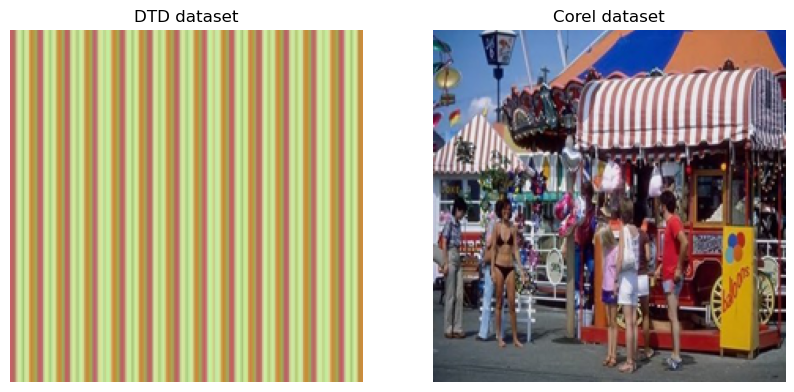

In [3]:
# Display the first image from each dataset
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(dtd_images[0])
plt.title('DTD dataset')
plt.axis('off')
plt.subplot(122)
plt.imshow(corel_images[0])
plt.title('Corel dataset')
plt.axis('off')
plt.show()

# Traditional Feature Extraction

## Color Histograms

In [7]:
#Calculate color histograms for the images.

# Extract features from dtd images
dtd_color_histograms = extract_color_histogram(dtd_images)
dtd_lbp_features = extract_lbp(dtd_images)
dtd_hog_features = extract_hog(dtd_images)
dtd_SIFT_features = extract_SIFT_features(dtd_images)

# Extract features from corel images
corel_color_histograms = extract_color_histogram(corel_images)
corel_lbp_features = extract_lbp(corel_images)
corel_hog_features = extract_hog(corel_images)
corel_SIFT_features = extract_SIFT_features(corel_images)



# Convert lists to numpy arrays
dtd_color_histograms = np.array(dtd_color_histograms)
dtd_lbp_features = np.array(dtd_lbp_features)
dtd_hog_features = np.array(dtd_hog_features)
dtd_SIFT_features = np.array(dtd_SIFT_features)

corel_color_histograms = np.array(corel_color_histograms)
corel_lbp_features = np.array(corel_lbp_features)
corel_hog_features = np.array(corel_hog_features)
corel_SIFT_features = np.array(corel_SIFT_features)


# Print the shape of the extracted features
print('DTD dataset')
print(f'Color histograms shape: {dtd_color_histograms.shape}')
print(f'LBP features shape: {dtd_lbp_features.shape}')
print(f'HOG features shape: {dtd_hog_features.shape}')
print(f'SIFT features shape: {dtd_SIFT_features.shape}')

print('**********************************************************')

print('Corel dataset')
print(f'Color histograms shape: {corel_color_histograms.shape}')
print(f'LBP features shape: {corel_lbp_features.shape}')
print(f'HOG features shape: {corel_hog_features.shape}')
print(f'SIFT features shape: {corel_SIFT_features.shape}')



ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5640,) + inhomogeneous part.